In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='02-Chunk3', logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
features = [predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 3

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1827.791, BIC=1846.175, Fit time=1.791 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1962.638, BIC=1977.345, Fit time=0.455 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1864.170, BIC=1878.877, Fit time=1.050 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1829.085, BIC=1851.146, Fit time=2.021 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1986.101, BIC=2000.808, Fit time=0.611 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1831.230, BIC=1856.967, Fit time=5.793 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1811.604, BIC=1833.664, Fit time=2.187 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error: 5.07417608657  Num NaN: 0'

'Test Error: 6.38998095112    Num NaN: 0'

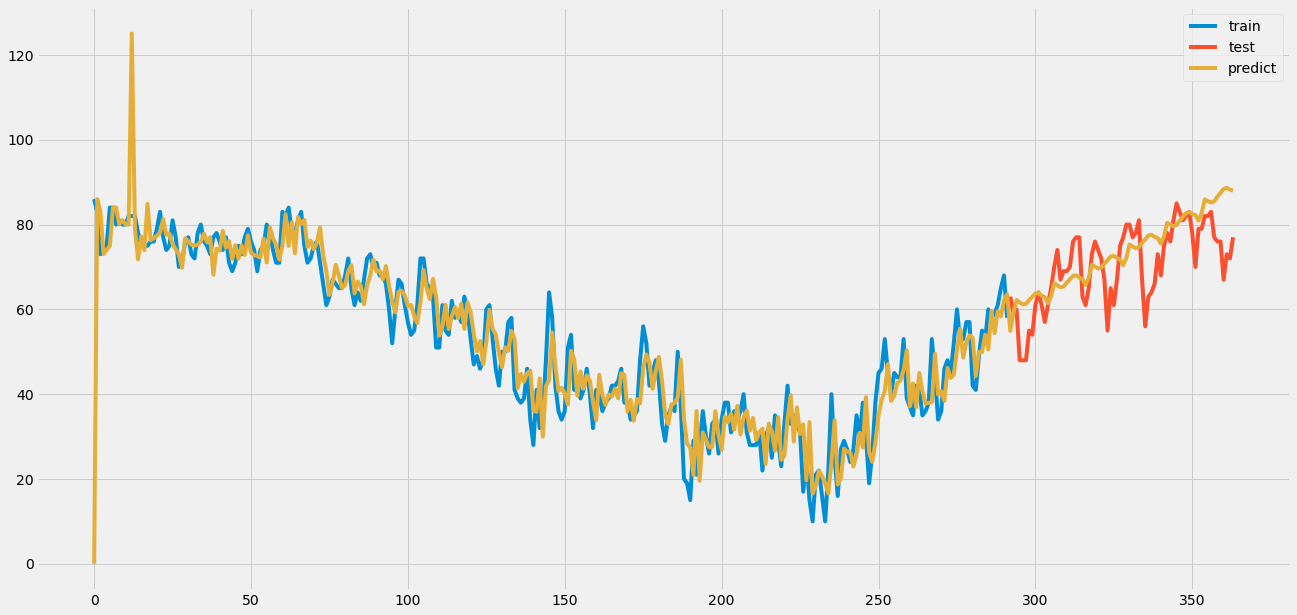

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 4.50479452055  Num NaN: 0'

'Test Error: 4.60555555556    Num NaN: 0'

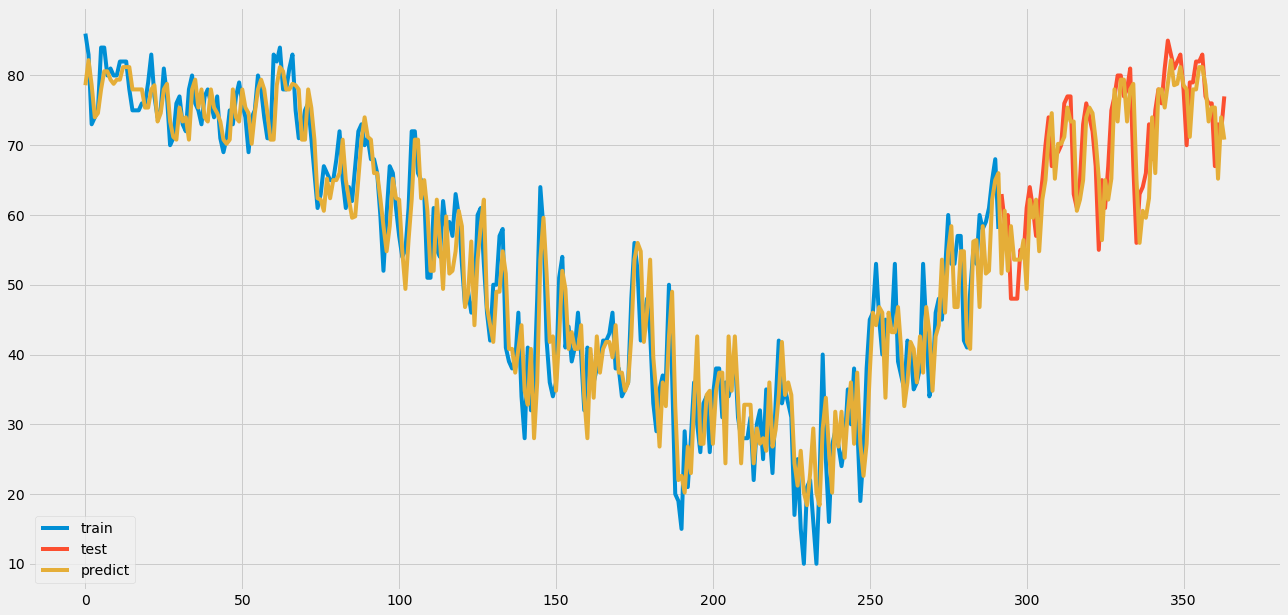

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 1.33025725567e+12  Num NaN: 0'

'Test Error: 1.78222918258e+12    Num NaN: 0'

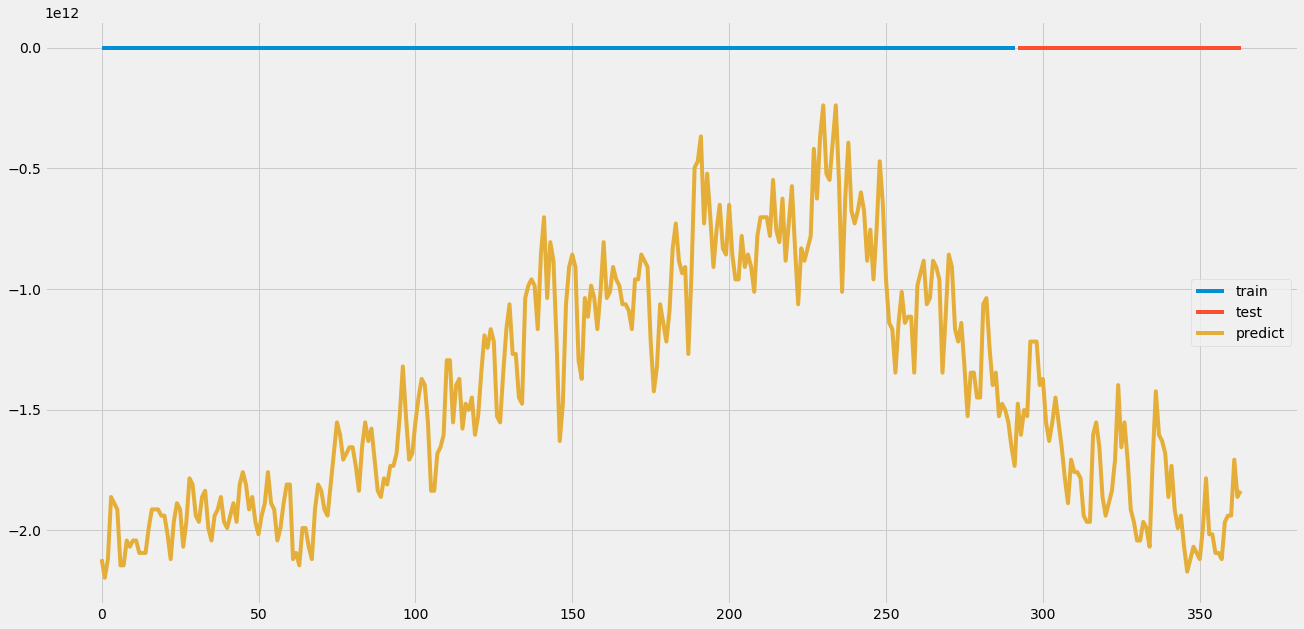

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 4.34983779751  Num NaN: 0'

'Test Error: 4.53142933455    Num NaN: 0'

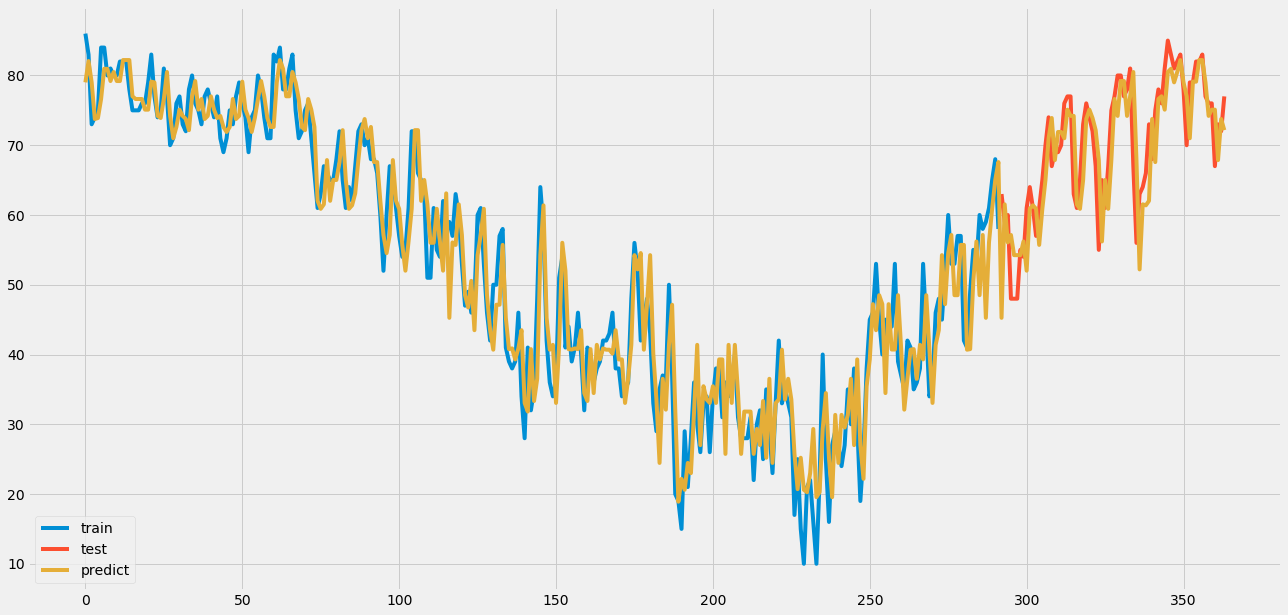

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 4.7021513997  Num NaN: 0'

'Test Error: 4.81200911561    Num NaN: 0'

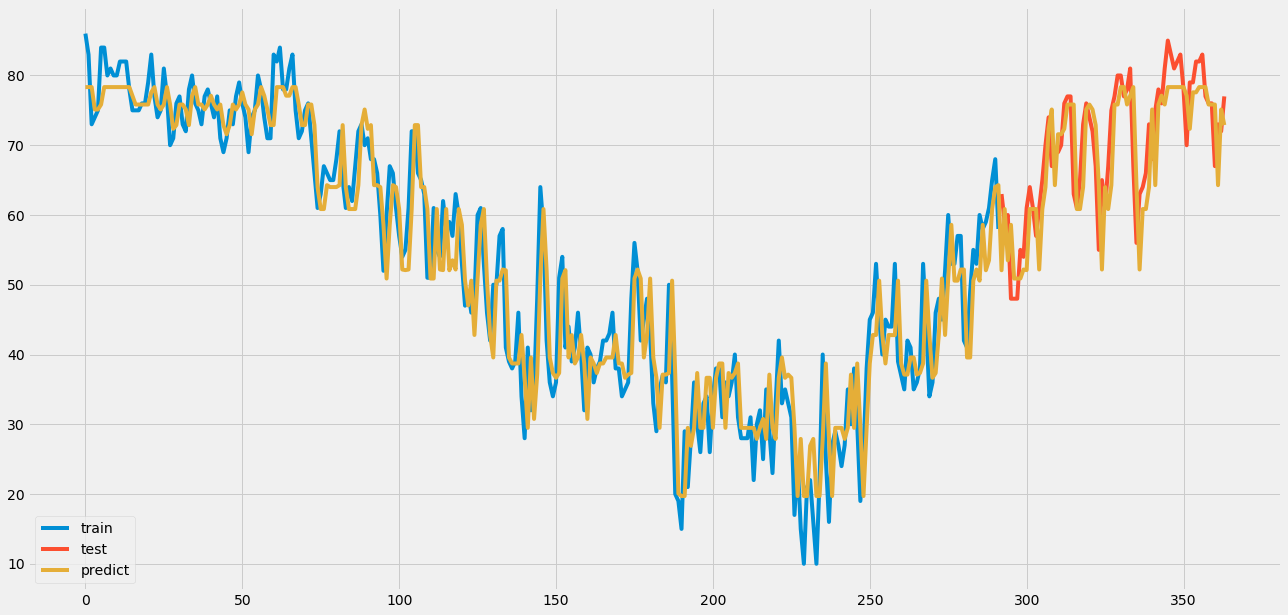

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 4.26186738031  Num NaN: 0'

'Test Error: 4.49174492061    Num NaN: 0'

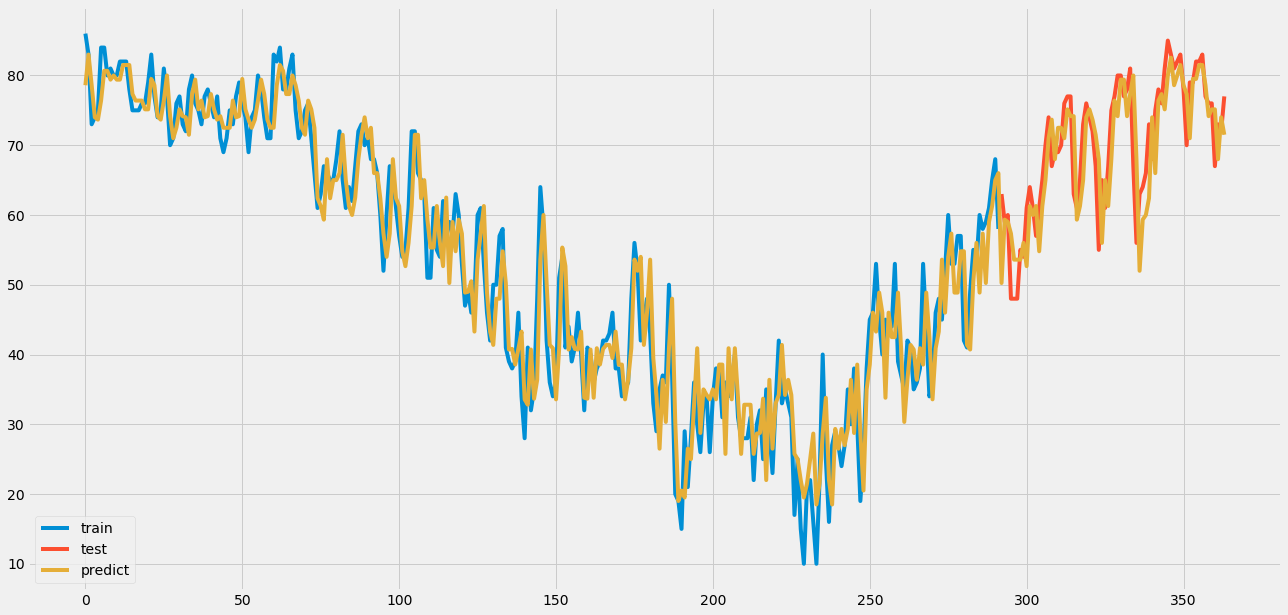

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 5.91428232101  Num NaN: 3'

'Test Error: 6.29976766124    Num NaN: 3'

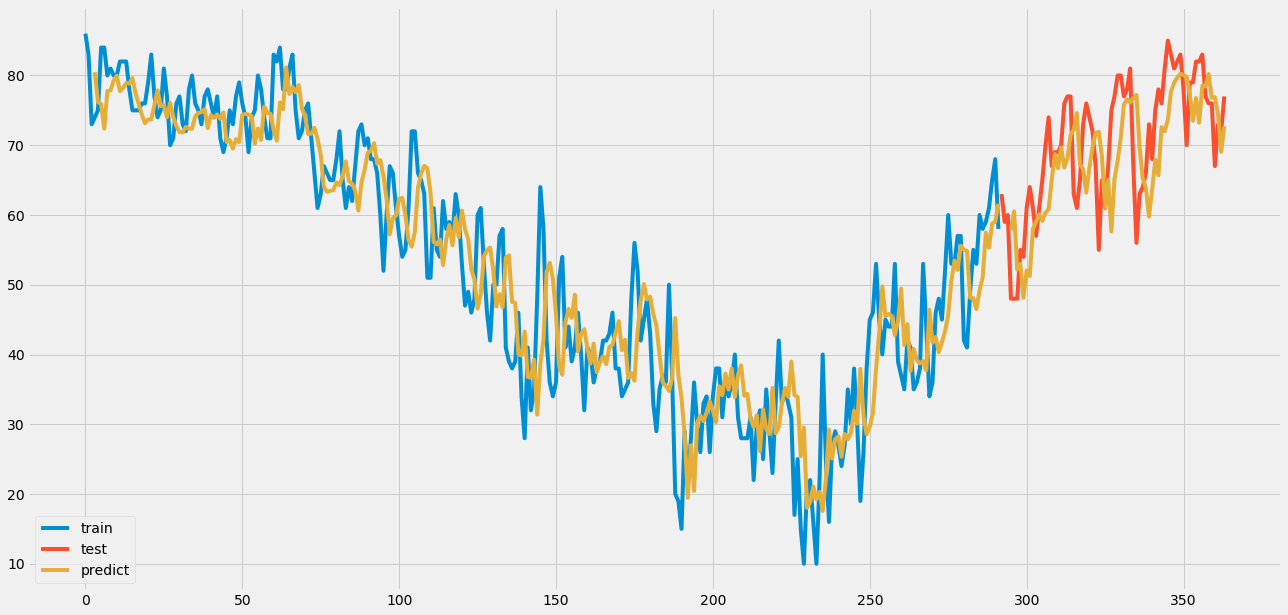

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 289 samples, validate on 69 samples
Epoch 1/10
 - 1s - loss: 0.2569 - val_loss: 0.1785
Epoch 2/10
 - 0s - loss: 0.2142 - val_loss: 0.2022
Epoch 3/10
 - 0s - loss: 0.2037 - val_loss: 0.1896
Epoch 4/10
 - 0s - loss: 0.2006 - val_loss: 0.1792
Epoch 5/10
 - 0s - loss: 0.1889 - val_loss: 0.1378
Epoch 6/10
 - 0s - loss: 0.1969 - val_loss: 0.2500
Epoch 7/10
 - 0s - loss: 0.1902 - val_loss: 0.1701
Epoch 8/10
 - 0s - loss: 0.1940 - val_loss: 0.1773
Epoch 9/10
 - 0s - loss: 0.1961 - val_loss: 0.1754
Epoch 10/10
 - 0s - loss: 0.1935 - val_loss: 0.1876


'Train Error: 14.2194574844  Num NaN: 3'

'Test Error: 14.0702059096    Num NaN: 3'

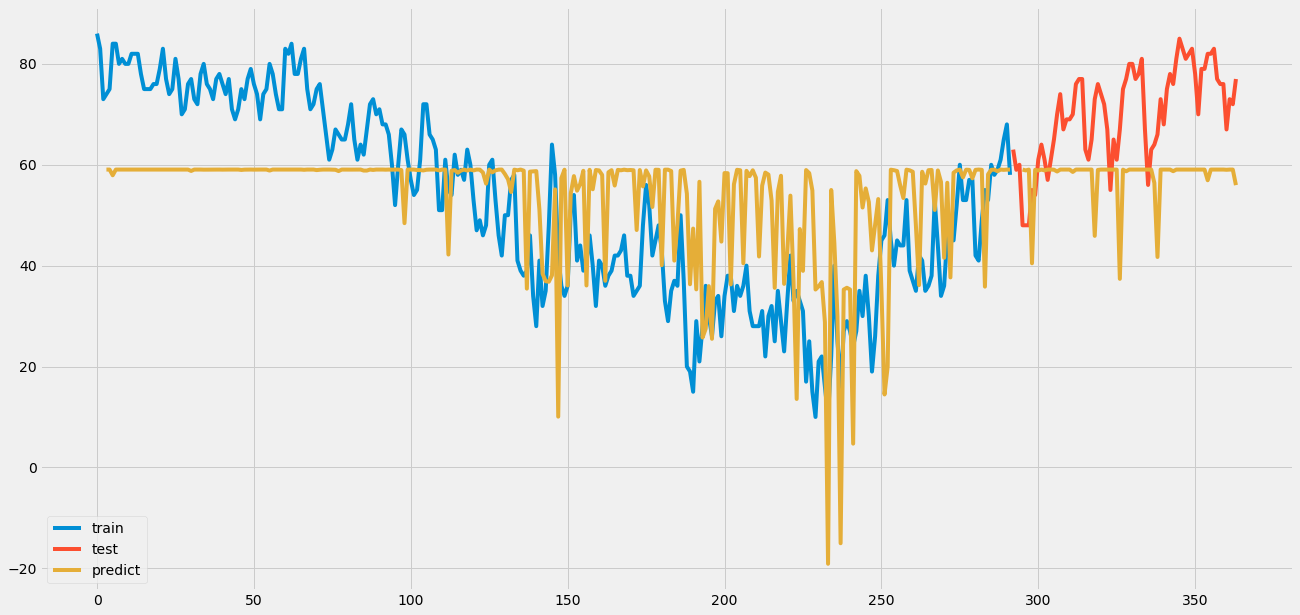

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 289 samples, validate on 69 samples
Epoch 1/10
 - 1s - loss: 0.3576 - val_loss: 0.4160
Epoch 2/10
 - 0s - loss: 0.2378 - val_loss: 0.2718
Epoch 3/10
 - 0s - loss: 0.2357 - val_loss: 0.1876
Epoch 4/10
 - 0s - loss: 0.2383 - val_loss: 0.2031
Epoch 5/10
 - 0s - loss: 0.2388 - val_loss: 0.2625
Epoch 6/10
 - 0s - loss: 0.2337 - val_loss: 0.4580
Epoch 7/10
 - 0s - loss: 0.2450 - val_loss: 0.5115
Epoch 8/10
 - 0s - loss: 0.2447 - val_loss: 0.3475
Epoch 9/10
 - 0s - loss: 0.2362 - val_loss: 0.1433
Epoch 10/10
 - 0s - loss: 0.2311 - val_loss: 0.2749


'Train Error: 16.5060999517  Num NaN: 3'

'Test Error: 20.619019771    Num NaN: 3'

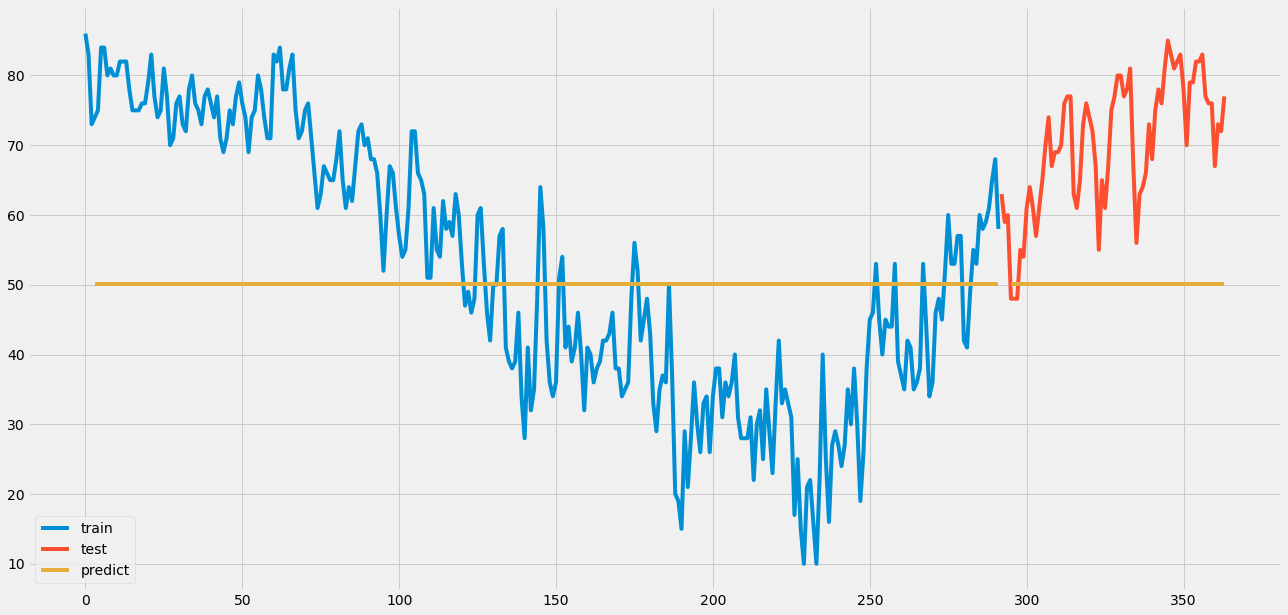

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

Train on 98 samples, validate on 25 samples
Epoch 1/10
 - 1s - loss: 0.6824 - val_loss: 0.3079
Epoch 2/10
 - 0s - loss: 0.2174 - val_loss: 0.1270
Epoch 3/10
 - 0s - loss: 0.0962 - val_loss: 0.0652
Epoch 4/10
 - 0s - loss: 0.0505 - val_loss: 0.0366
Epoch 5/10
 - 0s - loss: 0.0263 - val_loss: 0.0197
Epoch 6/10
 - 0s - loss: 0.0138 - val_loss: 0.0106
Epoch 7/10
 - 0s - loss: 0.0079 - val_loss: 0.0057
Epoch 8/10
 - 0s - loss: 0.0050 - val_loss: 0.0031
Epoch 9/10
 - 0s - loss: 0.0034 - val_loss: 0.0018
Epoch 10/10
 - 0s - loss: 0.0025 - val_loss: 0.0012


'Train Error: 21.9501462146  Num NaN: 0'

'Test Error: 12.2637371487    Num NaN: 0'

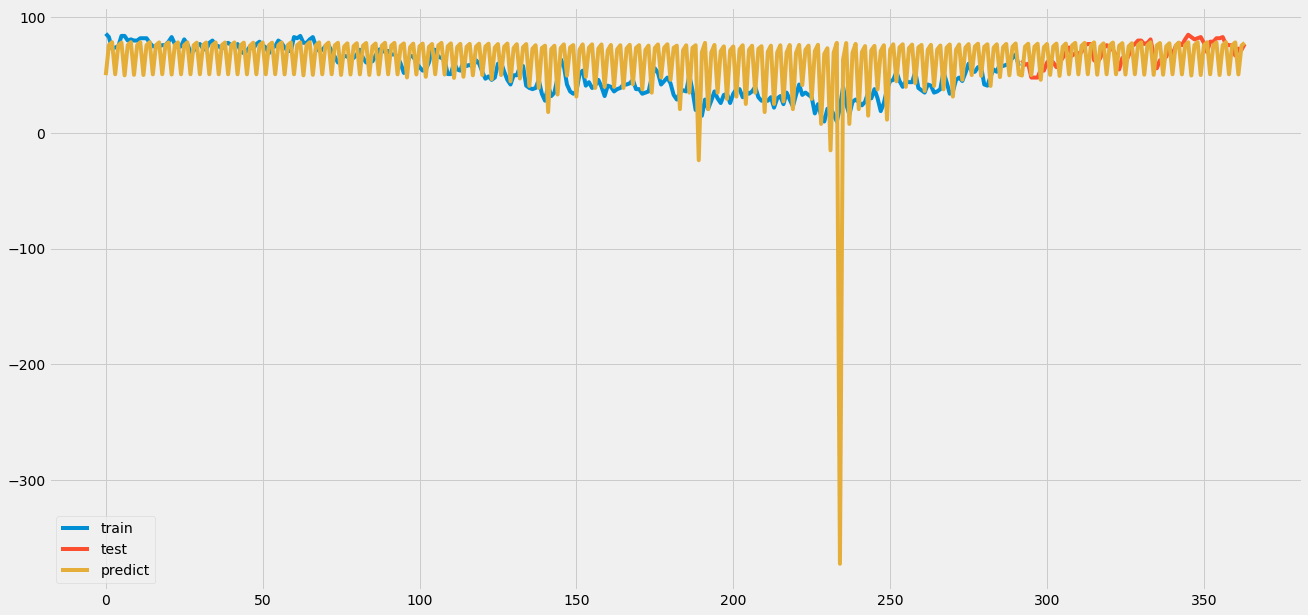

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 1 samples, validate on 1 samples
Epoch 1/10
 - 2s - loss: 1.2165 - val_loss: 0.9458
Epoch 2/10
 - 1s - loss: 0.9679 - val_loss: 0.7694
Epoch 3/10
 - 1s - loss: 0.7658 - val_loss: 0.6477
Epoch 4/10
 - 1s - loss: 0.6259 - val_loss: 0.5571
Epoch 5/10
 - 1s - loss: 0.5325 - val_loss: 0.4830
Epoch 6/10
 - 1s - loss: 0.4567 - val_loss: 0.4187
Epoch 7/10
 - 1s - loss: 0.3925 - val_loss: 0.3640
Epoch 8/10
 - 1s - loss: 0.3374 - val_loss: 0.3153
Epoch 9/10
 - 1s - loss: 0.2897 - val_loss: 0.2741
Epoch 10/10
 - 1s - loss: 0.2495 - val_loss: 0.2418


'Train Error: 2193.94706141  Num NaN: 0'

'Test Error: 2438.96677653    Num NaN: 0'

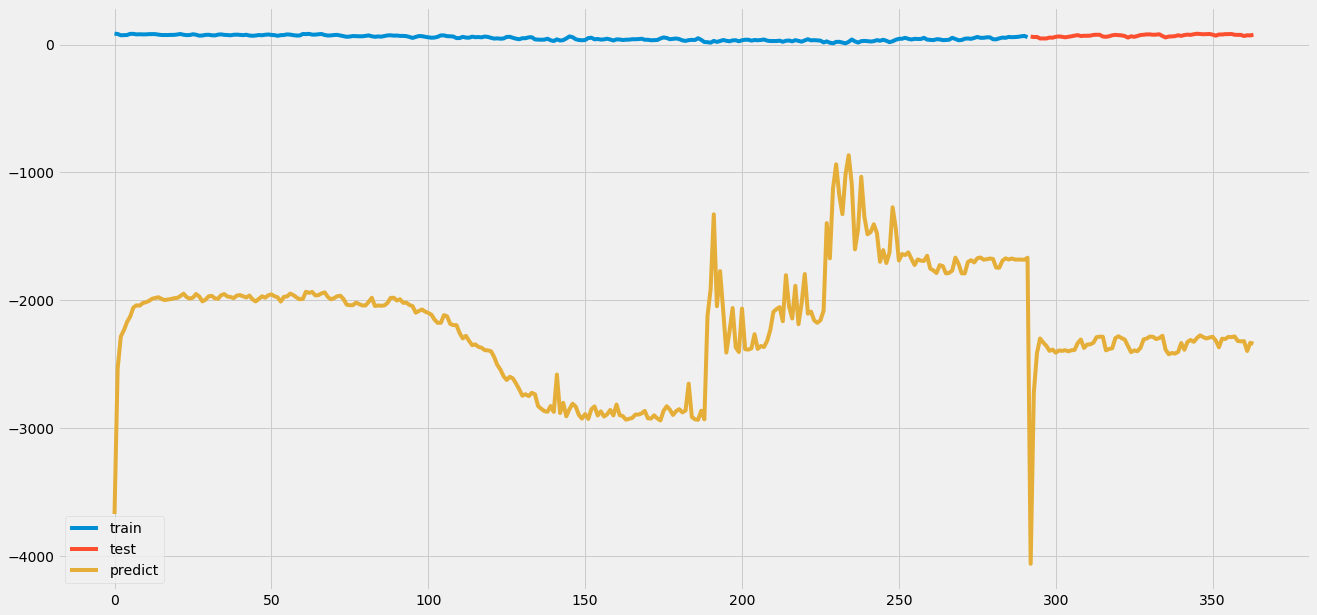

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')